In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 500)

### Data Overview

In [30]:
test_df = pd.read_csv("data/test.csv")
test_df.shape

(7662, 291)

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.shape

(30471, 292)

In [4]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [31]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

Check instersection of train and test columns

In [34]:
set(train_df.columns) - set(test_df.columns)

{'price_doc'}

Check type correspondence

In [95]:
train_d = train_df.dtypes.to_dict()
test_d = test_df.dtypes.to_dict()
matching_dtypes = {key: (train_d[key], test_d[key]) for key in train_d.keys() 
                   if ((key != 'price_doc') and (train_d[key] != test_d[key]))}
matching_dtypes

{'floor': (dtype('float64'), dtype('int64')),
 'full_sq': (dtype('int64'), dtype('float64')),
 'material': (dtype('float64'), dtype('int64')),
 'max_floor': (dtype('float64'), dtype('int64')),
 'num_room': (dtype('float64'), dtype('int64'))}

Make type conversion

In [126]:
train_df[['full_sq']] = train_df[['full_sq']].apply(pd.to_numeric, args=(('downcast','float')))
test_df[['floor', 'material', 'max_floor', 'num_room']] = test_df[['floor', 'material', 'max_floor', 'num_room']].apply(pd.to_numeric, args=(('downcast','float')))

Split categorical and numurical features

In [5]:
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns
categorical_cols = list(set(cols) - set(num_cols))
categorical_cols.remove('timestamp')

In [21]:
train_df[num_cols].describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [7]:
train_df[categorical_cols].describe()

,railroad_terminal_raion,product_type,big_market_raion,big_road1_1line,sub_area,railroad_1line,oil_chemistry_raion,detention_facility_raion,radiation_raion,thermal_power_plant_raion,nuclear_reactor_raion,incineration_raion,culture_objects_top_25,ecology,water_1line
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,2,2,2,2,146,2,2,2,2,2,2,2,2,5,2
top,no,Investment,no,no,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,poor,no
freq,29335,19448,27649,29690,1776,29578,30175,27427,19600,28817,29608,28155,28543,8018,28134


Count missing values

In [8]:
missing_count = (train_df.isnull().sum() / train_df.shape[0]) * 100.0
missing_count = missing_count[missing_count > 0]
missing_count.sort_values(ascending=False)

hospital_beds_raion                      47.392603
build_year                               44.649011
state                                    44.498047
cafe_sum_500_min_price_avg               43.585704
cafe_sum_500_max_price_avg               43.585704
cafe_avg_price_500                       43.585704
max_floor                                31.413475
material                                 31.413475
num_room                                 31.413475
kitch_sq                                 31.413475
preschool_quota                          21.948738
school_quota                             21.938893
cafe_sum_1000_max_price_avg              21.410521
cafe_sum_1000_min_price_avg              21.410521
cafe_avg_price_1000                      21.410521
life_sq                                  20.947786
build_count_before_1920                  16.379508
build_count_block                        16.379508
raion_build_count_with_material_info     16.379508
build_count_wood               

QQ-plot for target

((array([-4.07764062, -3.86644899, -3.75109077, ...,  3.75109077,
          3.86644899,  4.07764062]),
  array([ 11.51293546,  12.15478461,  12.20607765, ...,  18.32709614,
          18.37067606,  18.52604128])),
 (0.58651573976941329, 15.609483171522076, 0.97001952755917309))

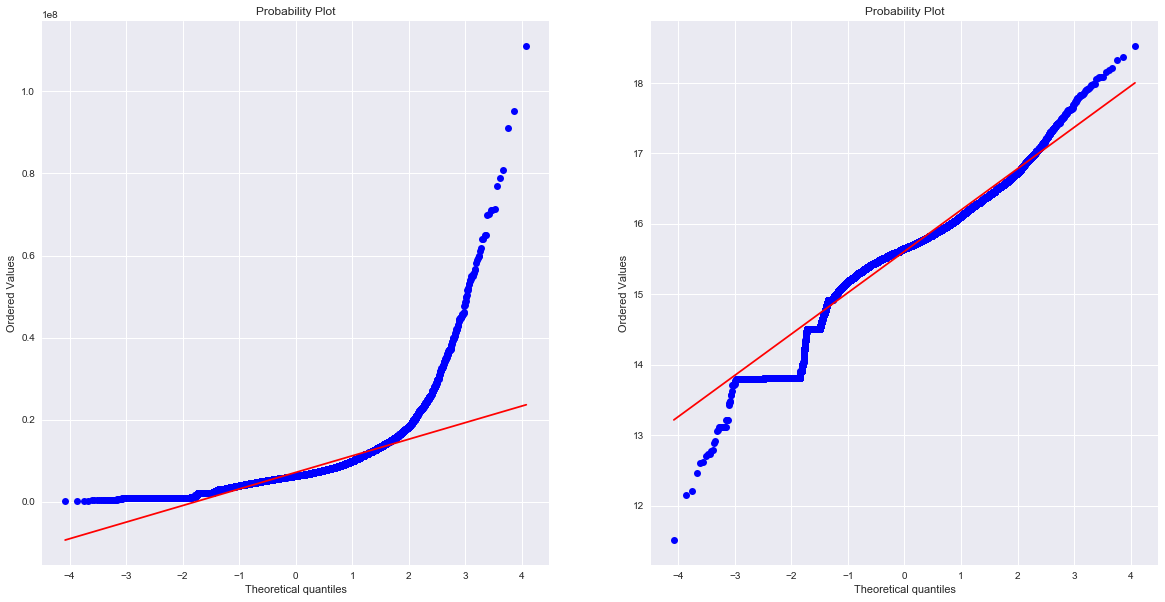

In [17]:
from scipy import stats
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
stats.probplot(train_df["price_doc"], plot=axes[0])
stats.probplot(np.log1p(train_df["price_doc"]), plot=axes[1])

Relationship price with some categorical features

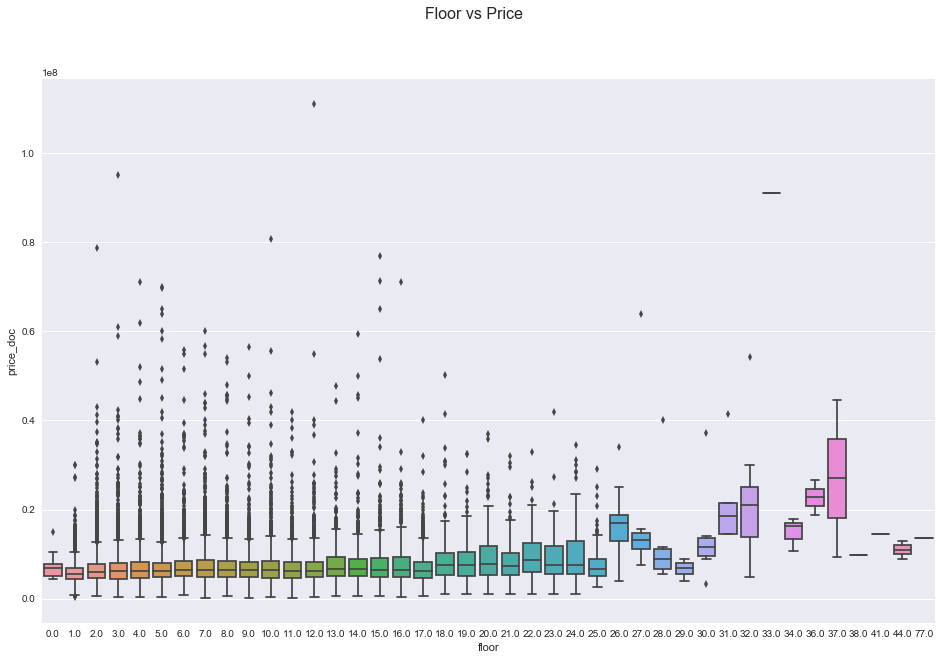

In [9]:
var = 'floor'
data = pd.concat([train_df['price_doc'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Floor vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

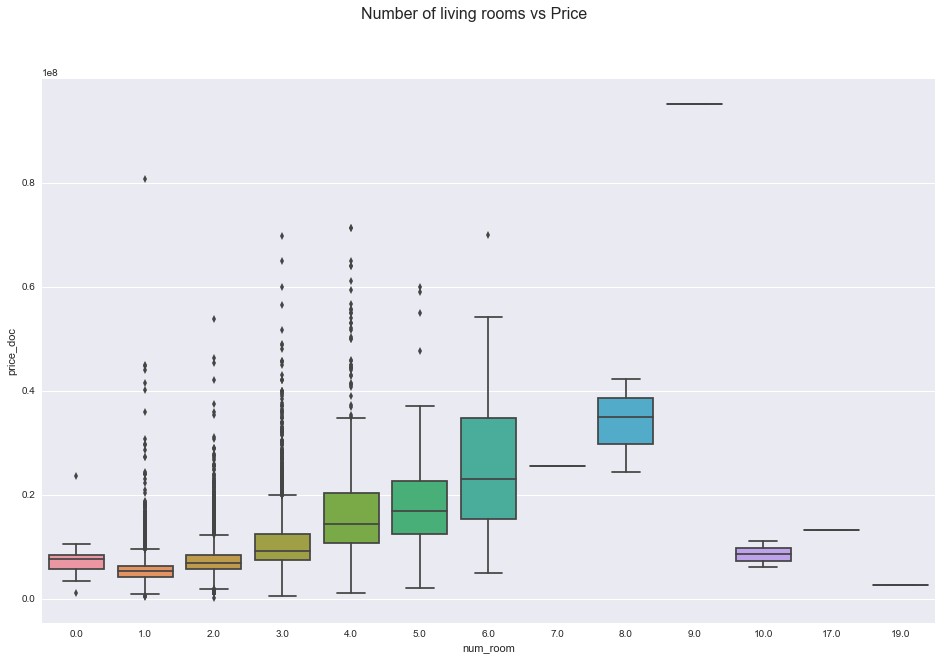

In [10]:
var = 'num_room'
data = pd.concat([train_df['price_doc'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Number of living rooms vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

### Data Preparation

It's better to encode categorical features. I use label encoding, but I'm not sure that it's the best practice for such task.

In [11]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
dict_encoder = defaultdict(LabelEncoder)

for col in categorical_cols:    
    train_df[col] = dict_encoder[col].fit_transform(train_df[col])

In [12]:
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
train_y = train_df.price_doc.values

There are a lot of NaN values we should clean them before start to proccessing

In [13]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_X)

We have too much features, let's try to find most important without cumbersome graphics  
http://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection

In [14]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [15]:
lasso = Lasso()
model = lasso.fit(train_X, train_y)

C:\Users\DolmatovKI\Desktop\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [16]:
select_model = SelectFromModel(lasso, prefit=True)

In [17]:
train_X_new = select_model.transform(train_X)

In [18]:
train_X_new.shape

(30471, 288)

In [19]:
train_X.shape

(30471, 289)

I can't reduce dimension using this method. I've also tried to use "Tree-based feature selection" but it takes all memory. Without doubt there are exist some pretty methods for reduce dimension but it's not my main aim. I just want to meet with main methods of ML which are mentioned in Andrew Ng course. That's why I take important features from this kernel:
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank

In [20]:
important_features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'kitch_sq', 'state']
train_df = train_df[important_features]

Look at selected features from NaN point of view

In [21]:
missing_count = (train_df.isnull().sum() / train_df.shape[0]) * 100.0
missing_count.sort_values(ascending=False)

build_year    44.649011
state         44.498047
kitch_sq      31.413475
max_floor     31.413475
life_sq       20.947786
floor          0.548062
full_sq        0.000000
dtype: float64

Replace NaN

In [22]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_df)

Standardize features by removing the mean and scaling to unit variance

In [23]:
from sklearn.preprocessing import StandardScaler
train_X = StandardScaler().fit_transform(train_X.copy())

### Make metric

In [24]:
def rmsle(predicted, actual):
    return np.sqrt(np.nansum(np.square(np.log(predicted + 1) - np.log(actual + 1)))/float(len(actual)))

In [25]:
from sklearn.metrics import make_scorer
scorer = make_scorer(rmsle, greater_is_better=False)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
def rmsle_cv(model, X, y, scorer, cv=10):
    # https://stackoverflow.com/questions/19993711/negative-value-for-mean-squared-error
    rmsle = -cross_val_score(model, X=X, y=y, scoring=scorer, cv=cv)
    return(rmsle)

### Submission Function

In [28]:
def make_sub(filename, predictions):
    df = pd.DataFrame({'id' : range(30474, 38136), 'price_doc' : np.round(predictions, 2)})
    df.to_csv(filename + '.csv', sep=',', index=False, line_terminator='\n', encoding='utf-8')

### Linear Regression without regularization

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression(n_jobs=-1)
reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [30]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 1533584.39389809   522347.08178737   397345.83798455   189477.33869001
  -163715.13008574    68753.44174047   666363.24502944]


In [31]:
train_y_pred = reg.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred, train_y))

RMSLE on Training set : 0.570686708599


In [32]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set : [ 0.75421179  0.56670118  0.53667265  0.56365184  0.55335055  0.55507442
  0.55541873  0.54557062  0.53279412  0.51727476]


Predict test

In [33]:
test_df = test_df[important_features]
test_X = imp.fit_transform(test_df)
test_X = StandardScaler().fit_transform(test_X.copy())

In [34]:
test_y_pred = reg.predict(test_X)

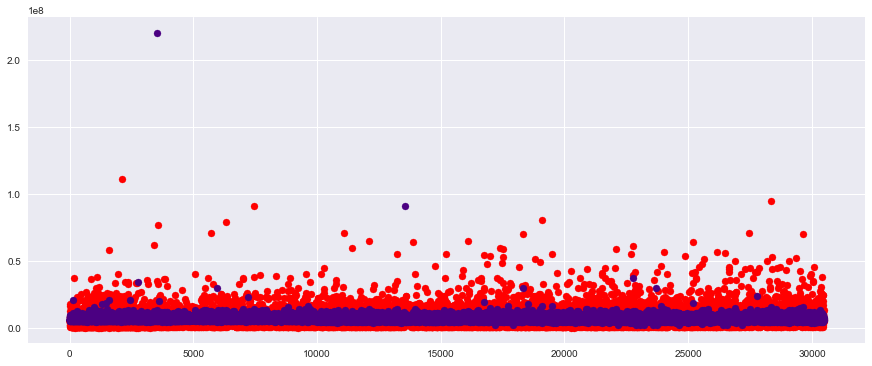

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred, label = "Predicted data", c='indigo');

In [36]:
make_sub(filename='linear_regr', predictions=test_y_pred)

##### Public Submission Score: 0.41055

---

### Linear Regression with Lasso Regularization (L1 - penalty)

In [37]:
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(train_X, train_y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
print('Coefficients: \n', reg_lasso.coef_)

Coefficients: 
 [ 1533584.31269549   522346.99184561   397345.76227538   189477.26788458
  -163714.99005078    68753.35134353   666363.09357519]


In [39]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg.coef_)

Coefficients (Difference): 
 [-0.0812026  -0.08994176 -0.07570917 -0.07080543  0.14003497 -0.09039693
 -0.15145425]


In [40]:
train_y_pred_lasso = reg_lasso.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso, train_y))

RMSLE on Training set : 0.570686710581


In [41]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_lasso, train_y))

RMSLE on Training set (Difference): -1.98185001743e-09


In [42]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set : [ 0.75421179  0.56670118  0.53667266  0.5636481   0.55335055  0.55507443
  0.55541874  0.54557063  0.53279413  0.51727476]


In [43]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set (Difference): [  4.02863565e-09   4.65655958e-10   2.46183773e-09  -3.74004966e-06
  -5.96228289e-09   1.75884596e-09   1.82614401e-09   2.20585816e-09
   1.03944564e-09   1.09591003e-09]


We can observe a very small difference between Linear Regression models with or without L1.  
I suppose we should to optimize alpha parameter of L1 regulariztion.

In [44]:
reg_lasso_cv = linear_model.LassoCV(n_alphas=1000, max_iter=1000, cv=10)

In [45]:
reg_lasso_cv.fit(train_X, train_y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=1000, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [46]:
reg_lasso_cv.alpha_

1337110.3849890318

In [47]:
reg_lasso_cv.coef_

array([ 296898.25642662,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,       0.        ])

In [48]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg_lasso_cv.coef_)

Coefficients (Difference): 
 [ 1236686.05626886   522346.99184561   397345.76227538   189477.26788458
  -163714.99005078    68753.35134353   666363.09357519]


In [49]:
train_y_pred_lasso_cv = reg_lasso_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso_cv, train_y))

RMSLE on Training set : 0.617522235071


In [50]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred_lasso_cv, train_y) - rmsle(train_y_pred_lasso, train_y))

RMSLE on Training set (Difference): 0.0468355244904


In [51]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set : [ 0.80068999  0.5682469   0.58006074  0.59832251  0.59581318  0.60289553
  0.60490969  0.60332871  0.58500452  0.57418275]


In [52]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set (Difference): [ 0.04647819  0.00154572  0.04338808  0.03467441  0.04246263  0.04782111
  0.04949096  0.05775809  0.0522104   0.05690799]


Predict test

In [53]:
test_y_pred_lasso_cv = reg_lasso_cv.predict(test_X)

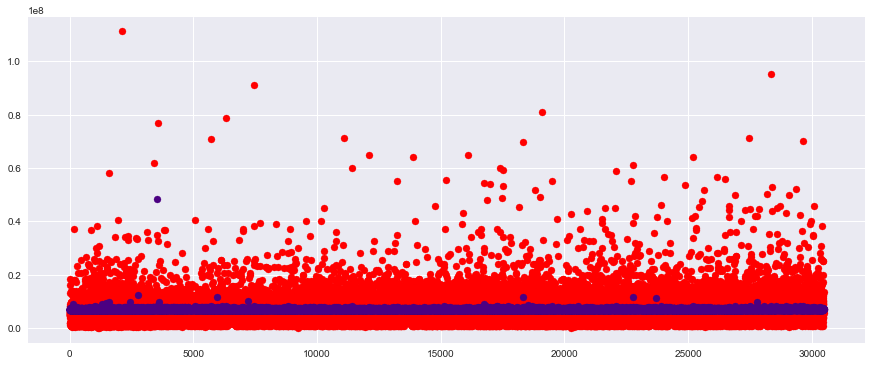

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_lasso_cv, label = "Predicted data", c='indigo');

In [55]:
make_sub(filename='linear_regr_lasso_cv', predictions=test_y_pred_lasso_cv)

##### Public Submission Score: 0.50625
Predictably, we get worse result in comparison with simple Linear Regression. Because we use only one feature. I suppose it's better to apply L1 regularization to full set of features. However, I don't want to become cowboy (Lasso Master). Therefore, I'll go futher.

### Linear Regression with Ridge Regularization (L2 - penalty)

In [56]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]
reg_ridge_cv = linear_model.RidgeCV(alphas=alphas, cv=10)
reg_ridge_cv.fit(train_X, train_y)

RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100],
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [57]:
print('Coefficients (Difference): \n', reg.coef_ - reg_ridge_cv.coef_)

Coefficients (Difference): 
 [ 4864.09279899  1074.12034347  1059.52529825    74.07469108 -1291.83973923
    34.24607907  2865.28526805]


In [58]:
train_y_pred_ridge_cv = reg_ridge_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_ridge_cv, train_y))

RMSLE on Training set : 0.570790566287


In [59]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_ridge_cv, train_y))

RMSLE on Training set (Difference): -0.000103857687967


In [60]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_ridge_cv, X=train_X, y=train_y, scorer=scorer))

CV RMSLE on Training set (Difference): [ -1.32534283e-04  -1.00845641e-04  -1.13439172e-04   7.31742429e-03
   2.98071323e-04  -9.76294600e-05  -9.56738109e-05  -1.20529713e-04
  -9.15807966e-05  -9.37235576e-05]


Predict test

In [61]:
test_y_pred_ridge_cv = reg_ridge_cv.predict(test_X)

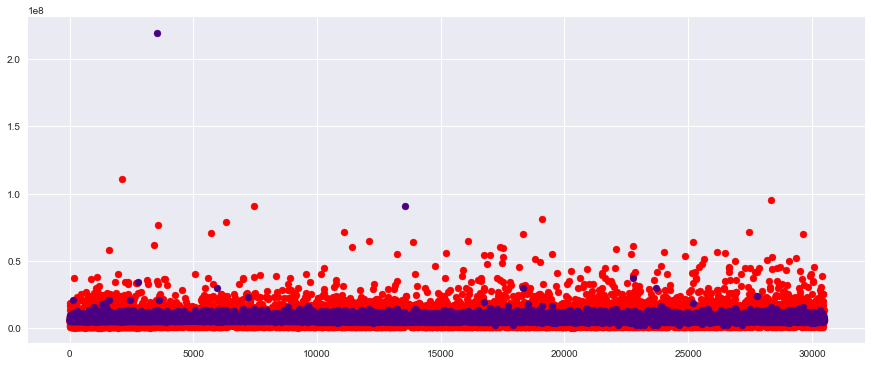

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_ridge_cv, label = "Predicted data", c='indigo');

In [63]:
make_sub(filename='linear_regr_ridge_cv', predictions=test_y_pred_ridge_cv)

##### Public Submission Score: 0.41069
The PLB score is very close to Linear Regression model without any regularization. Also, we should take into consideration that there isn't signifacant change of score on train data, according to RMLSE metric. Thus, selection of parameters is the room for improvement. However, I want to explore more machine learning algorthms. Like I said, my main aim for this competition isn't rewards but obtaining initial expertise in learning process.

### Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

C:\Users\DolmatovKI\Desktop\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DolmatovKI\Desktop\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [65]:
parameters = {'max_depth':list(range(5, 20, 5)), 'min_samples_split':list(range(100, 150, 10)), 'min_samples_leaf':list(range(5, 20, 5))}

In [66]:
dtr_cv = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters, cv=50, n_jobs=4)

In [67]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_X = imp.fit_transform(train_df)

In [68]:
dtr_cv.fit(train_X, train_y)

GridSearchCV(cv=50, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_split': [100, 110, 120, 130, 140], 'min_samples_leaf': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
print (dtr_cv.best_score_, dtr_cv.best_params_)

0.47302286623737055 {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 130}


In [70]:
train_y_pred_dtr_cv = dtr_cv.predict(train_X)

In [71]:
test_X = imp.fit_transform(test_df)

In [72]:
test_y_pred_dtr_cv = dtr_cv.predict(test_X)

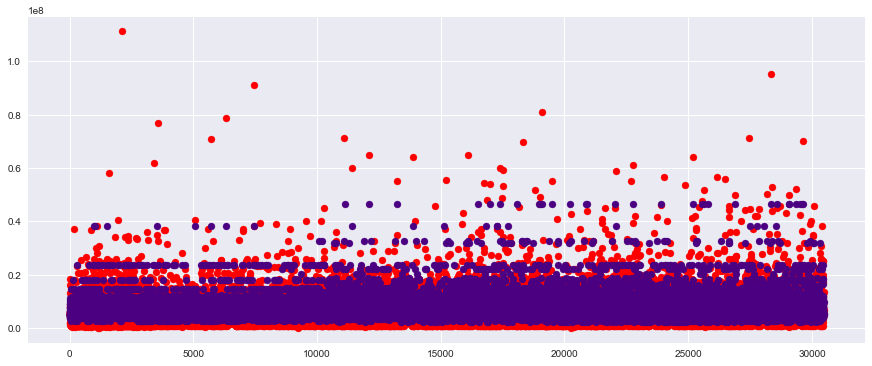

In [73]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_dtr_cv, label = "Predicted data", c='indigo');

In [74]:
make_sub(filename='decission_tree_cv', predictions=test_y_pred_dtr_cv)

##### Public Submission Score: 0.44267

---

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfr = RandomForestRegressor(random_state=42)
results = cross_val_score(rfr, train_X, train_y, cv=10)
print("CV MSE score: {:.2f}%".format(results.mean()*100))

CV MSE score: 42.75%


Now, let's try to optimize some parameters of our RandomForest:  
* n_estimators — the number of trees in the forest
* max_depth — the maximum depth of the tree
* min_samples_leaf — the minimum number of samples required to be at a leaf node
* max_features — the number of features to consider when looking for the best split

In [77]:
from sklearn.model_selection import KFold

In [78]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [79]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
number_trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in number_trees_grid:
    rfr = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} trees".format(max(test_mse.mean(axis=1))*100, 
                                                        number_trees_grid[np.argmax(test_mse.mean(axis=1))]))

Best MSE on CV is 50.23% with 100 trees


Make graph for **n_estimators** validation curve 

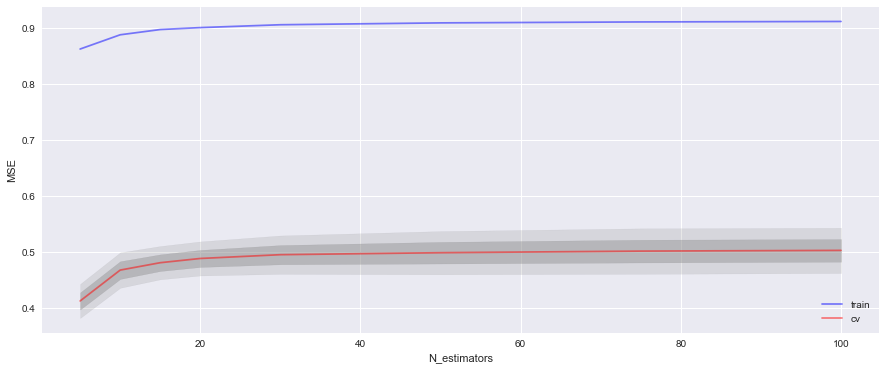

In [80]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(number_trees_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(number_trees_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("N_estimators");

* optimal n_estimators = 40

In [81]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for max_depth in max_depth_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_depth=max_depth)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} max_depth".format(max(test_mse.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_mse.mean(axis=1))]))

Best MSE on CV is 52.88% with 13 max_depth


Make graph for **max_depth** validation curve 

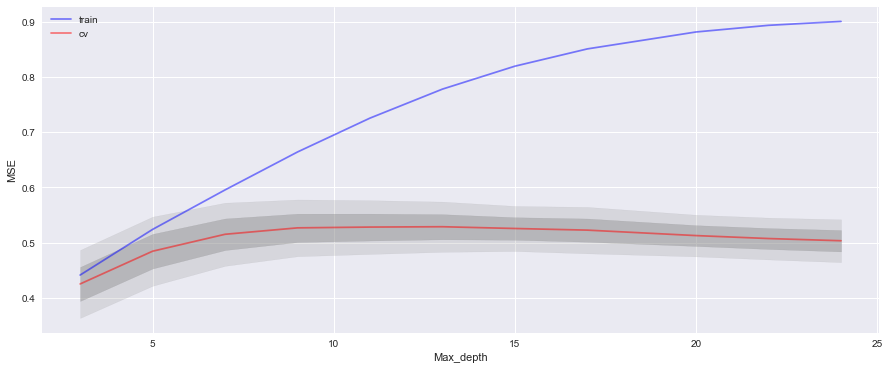

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_depth_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_depth");

* optimal max_depth = 13

In [83]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for min_samples_leaf in min_samples_leaf_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, min_samples_leaf=min_samples_leaf)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} min_samples_leaf".format(max(test_mse.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_mse.mean(axis=1))]))

Best MSE on CV is 53.01% with 7 min_samples_leaf


Make graph for **min_samples_leaf** validation curve 

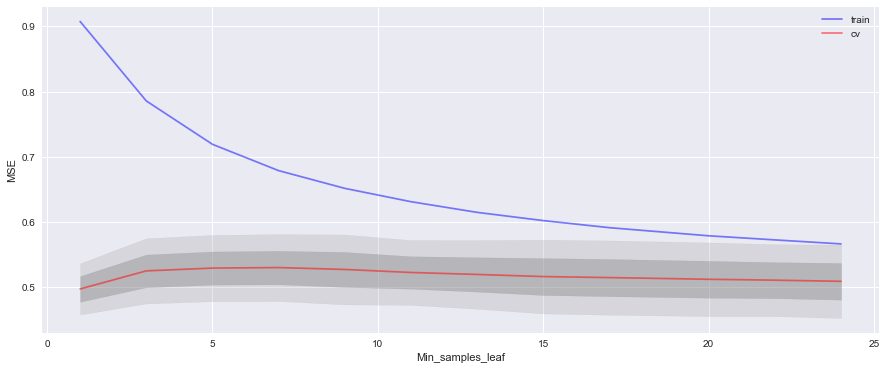

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(min_samples_leaf_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Min_samples_leaf");

* optimal min_samples_leaf = 7

In [85]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_features_grid = [1, 2, 3, 4, 5, 6, 7]


for max_features in max_features_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_features=max_features)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_mse.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_mse.mean(axis=1))]))

Best accuracy on CV is 50.02% with 4 max_features


Make graph for **max_features** validation curve 

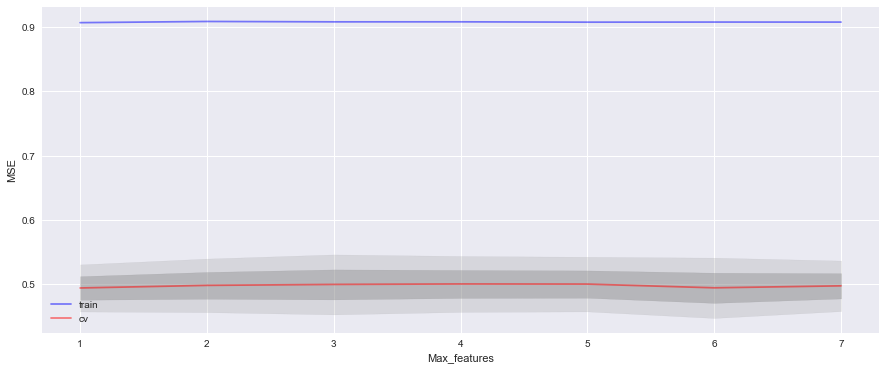

In [86]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_features_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_features");

I prefer to use all features because we have straight validation curve
* max_features = 7

Now, combine all our parameter particular optimizations

In [87]:
parameters = {'n_estimators': list(range(20, 45, 5)), 'max_depth': list(range(5, 14)), 'min_samples_leaf': list(range(5, 11))}

In [88]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfr, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(train_X, train_y)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 25, 30, 35, 40], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13], 'min_samples_leaf': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [89]:
gcv.best_params_

{'max_depth': 12, 'min_samples_leaf': 6, 'n_estimators': 40}

In [90]:
train_y_pred_gcv = gcv.predict(train_X)

In [91]:
test_X = imp.fit_transform(test_df)

In [92]:
test_y_pred_gcv = gcv.predict(test_X)

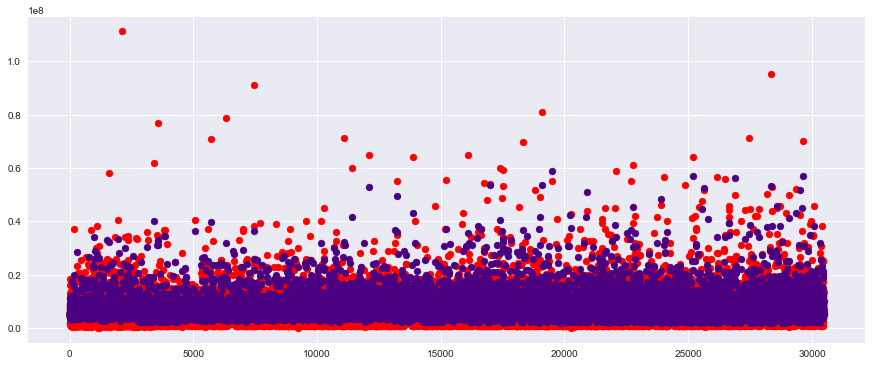

In [93]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_gcv, label = "Predicted data", c='indigo');

In [94]:
make_sub(filename='random_forest_cv', predictions=test_y_pred_gcv)

##### Public Submission Score: 0.41915

RandomForest looks like the most robust algorithm and this fact isn't seem strange. I suppose that we should use raw data (most features) to improve current results. Moreover, feature engineering is good room for improvement. But, I aslo want to involve k-nearest algoritm and only after that go on to the next stages (all features, feature engineering, reduce dimension methods, gbm)